In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
Xtrain = pickle.load(open('Xtrain_ANN.data', 'rb'))
Ytrain = pickle.load(open('Ytrain_ANN.data', 'rb'))

In [3]:
from sklearn.decomposition import PCA

In [4]:
pca = PCA(n_components=300)

In [5]:
pca.fit(Xtrain)

PCA(copy=True, iterated_power='auto', n_components=300, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [6]:
pca.explained_variance_

array([1.53691052e+00, 5.16500465e-01, 4.92459618e-01, 4.43202134e-01,
       3.99614104e-01, 3.72876303e-01, 3.49042553e-01, 3.04097511e-01,
       2.89354770e-01, 2.29071460e-01, 2.04303514e-01, 1.68814109e-01,
       1.49785300e-01, 1.32008636e-01, 1.24253536e-01, 1.06538146e-01,
       1.05250590e-01, 9.73593581e-02, 9.50140739e-02, 8.82032590e-02,
       8.55916831e-02, 8.33136565e-02, 7.05082068e-02, 6.77154448e-02,
       6.38925218e-02, 5.75539025e-02, 5.27527954e-02, 4.71630816e-02,
       4.58323345e-02, 4.48552047e-02, 4.23772561e-02, 4.02917274e-02,
       3.87634370e-02, 3.74488207e-02, 3.64137743e-02, 3.53232128e-02,
       3.02068584e-02, 2.74289509e-02, 2.59226469e-02, 2.57677953e-02,
       2.36207506e-02, 2.22883593e-02, 2.15980539e-02, 2.01095640e-02,
       1.94447804e-02, 1.77831039e-02, 1.71780155e-02, 1.65273082e-02,
       1.60715065e-02, 1.52420451e-02, 1.43324478e-02, 1.36315772e-02,
       1.28772559e-02, 1.24491177e-02, 1.23427165e-02, 1.21881820e-02,
      

In [7]:
pca.singular_values_

array([952.68336905, 552.28042499, 539.27415161, 511.59373042,
       485.78566609, 469.25259601, 454.00797364, 423.77050403,
       413.37062837, 367.79835612, 347.34592657, 315.7393151 ,
       297.41227537, 279.20646124, 270.88107937, 250.8284875 ,
       249.30819895, 239.78010334, 236.87447345, 228.22678272,
       224.82265666, 221.81064765, 204.05353693, 199.97152569,
       194.24475783, 184.35786944, 176.50094352, 166.88810337,
       164.5168106 , 162.75364122, 158.19425543, 154.25250857,
       151.29878162, 148.71109277, 146.64158296, 144.42899561,
       133.56020352, 127.27083415, 123.7268522 , 123.35675119,
       118.10577656, 114.72639376, 112.93579207, 108.97468441,
       107.1582996 , 102.47739458, 100.71885677,  98.79281384,
        97.42100059,  94.87371633,  91.99929029,  89.72166933,
        87.20390949,  85.74199401,  85.37479393,  84.83865159,
        83.62001251,  82.1639484 ,  81.60499191,  79.48728491,
        78.95298608,  76.08775292,  72.83266894,  72.53

In [8]:
Xtrain = pd.DataFrame(data=pca.transform(Xtrain))
Xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.147497,-0.128136,-0.555639,0.292194,-0.168896,1.501089,0.938601,0.363685,-0.396042,-0.006756,...,-0.000455,-0.001515,0.000172,0.000022,0.001064,-0.000853,-0.000600,0.000987,-0.000144,0.001535
1,0.215837,-0.316249,-0.480825,1.065285,-0.388672,0.314880,0.001645,-0.663226,-1.176959,0.081671,...,-0.000710,-0.000502,-0.000154,0.000139,0.001533,0.000672,-0.000224,-0.000028,-0.000351,0.001121
2,-1.357071,0.254334,0.212074,-0.170978,0.917643,-0.101091,0.896096,0.363993,0.523769,-0.618342,...,0.000163,-0.000352,-0.000133,0.000323,0.000025,-0.000563,-0.000791,-0.000583,0.000071,-0.000094
3,-0.699646,0.090907,-0.430041,0.786889,-0.922474,-0.422978,-0.176333,0.432002,0.212042,-0.075838,...,-0.002038,-0.006291,-0.003395,0.002031,0.000864,-0.003951,-0.004729,0.000309,-0.001404,-0.002227
4,2.361831,0.017103,1.310205,1.881893,-0.120688,-0.377364,0.510768,-0.666730,-0.220307,0.107169,...,0.003560,-0.004378,0.005977,-0.018032,-0.006768,0.003710,-0.010758,0.000546,-0.007120,-0.010769


In [9]:
Xtrain.shape

(590540, 300)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [11]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [12]:
earlystop = EarlyStopping(patience=15, restore_best_weights=True)

reduce_learning = ReduceLROnPlateau(patience=5, verbose=1, cooldown=10)

In [13]:
callbacks = [earlystop, reduce_learning]

In [14]:
clf = Sequential()

In [15]:
clf.add(Dense(units=200, activation='relu', kernel_initializer='random_uniform', bias_initializer='ones', input_dim=300))
clf.add(Dropout(rate=0.2))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
clf.add(Dense(units=200, activation='relu', kernel_initializer='random_uniform', bias_initializer='ones'))
clf.add(Dropout(rate=0.2))

In [17]:
clf.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

In [18]:
clf.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
clf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 100,601
Trainable params: 100,601
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = clf.fit(Xtrain, Ytrain, epochs=100, batch_size=64, validation_split=0.2, shuffle=True, callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.
Train on 472432 samples, validate on 118108 samples
Epoch 1/100
472432/472432 [==============================] - 18s 38us/step - loss: 0.1151 - acc: 0.9704 - val_loss: 0.1217 - val_acc: 0.9693
Epoch 2/100
472432/472432 [==============================] - 17s 36us/step - loss: 0.1073 - acc: 0.9722 - val_loss: 0.1278 - val_acc: 0.9663
Epoch 3/100
472432/472432 [==============================] - 17s 36us/step - loss: 0.1037 - acc: 0.9734 - val_loss: 0.1181 - val_acc: 0.9698
Epoch 4/100
472432/472432 [==============================] - 17s 36us/step - loss: 0.1007 - acc: 0.9744 - val_loss: 0.1234 - val_acc: 0.9691
Epoch 5/100
472432/472432 [==============================] - 17s 36us/step - loss: 0.0989 - acc: 0.9753 - val_loss: 0.1256 - val_acc: 0.9687
Epoch 6/100
472432/472432 [==============================] - 17s 36us/step - loss: 0.0975 - acc: 0.9758 - val_loss: 0.1291 - val_acc: 0.9693
Epoch 7/100
472432/472432 [===========================

In [21]:
clf.evaluate(Xtrain,Ytrain)

590540/590540 [==============================] - 13s 22us/step


[0.10183033629065676, 0.973556406001287]

In [22]:
clf.save('clf_ANN_mod.h5')

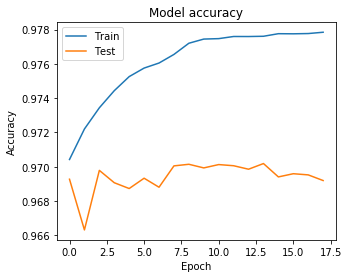

In [23]:
# Plot training & validation accuracy values
plt.figure(figsize=(5, 4))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

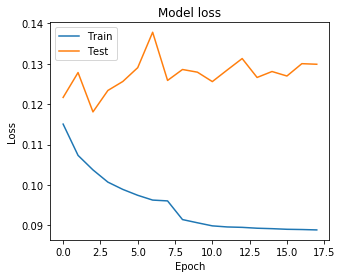

In [24]:
# Plot training & validation loss values
plt.figure(figsize=(5, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [25]:
from sklearn.metrics import log_loss, classification_report, confusion_matrix

In [26]:
Ytrain_ = clf.predict(Xtrain) > 0.5

In [27]:
print(log_loss(Ytrain, Ytrain_))
print(confusion_matrix(Ytrain, Ytrain_))
print(classification_report(Ytrain, Ytrain_))

0.9133308113885754
[[568820   1057]
 [ 14559   6104]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    569877
           1       0.85      0.30      0.44     20663

    accuracy                           0.97    590540
   macro avg       0.91      0.65      0.71    590540
weighted avg       0.97      0.97      0.97    590540



In [28]:
del(Xtrain)
del(Ytrain)

In [29]:
Xtest = pickle.load(open('Xtest_ANN.data', 'rb'))

In [30]:
Xtest = pd.Dataframe(data=pca.transform(Xtest))

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [ ]:
Ytest_ = clf.predict(Xtest)
del(Xtest)

In [ ]:
Ytest_

In [ ]:
submission = pd.read_csv('./raw/sample_submission.csv', index_col='TransactionID')

In [ ]:
submission.count()

In [ ]:
submission['isFraud'] = Ytest_
submission.head()

In [ ]:
submission.to_csv('predicted_ANN_mod.csv')

In [ ]:
submission[submission['isFraud'] > 0.5].count()